# Zeta Disease Prediction

In [1]:
# Set the working directory
import os
os.chdir(r'D:\2_p\p\Studies\DS\Car\carriercorporationtakehomechallenge')

In [2]:
# import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## Exploring the Train data

In [3]:
# Read the data file
df_train = pd.read_csv(r'2021-01-21_zeta-disease_training-data_dsi-take-home-challenge.csv')
df_train.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80,0,1.5038,0,10,0
1,23,150,38.5,68,71,0.3868,55,2,0
2,47,186,29.9,90,0,0.2728,0,7,0
3,18,150,30.8,70,1033,0.6598,56,0,0
4,24,160,32.4,74,125,0.7608,59,2,0


In [4]:
# Let us check the size of the data frame
df_train.shape

(800, 9)

### Train data frame has 8 coloumns ( 7 are independent variables and 1 dependent variable )

In [5]:
# let us print the column names
df_train.columns.values

array(['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test',
       'liver_stress_test', 'cardio_stress_test', 'years_smoking',
       'zeta_disease'], dtype=object)

In [6]:
# print info to check is there any null values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 800 non-null    int64  
 1   weight              800 non-null    int64  
 2   bmi                 800 non-null    float64
 3   blood_pressure      800 non-null    int64  
 4   insulin_test        800 non-null    int64  
 5   liver_stress_test   800 non-null    float64
 6   cardio_stress_test  800 non-null    int64  
 7   years_smoking       800 non-null    int64  
 8   zeta_disease        800 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 56.4 KB


In [7]:
df_train.isnull().sum()

age                   0
weight                0
bmi                   0
blood_pressure        0
insulin_test          0
liver_stress_test     0
cardio_stress_test    0
years_smoking         0
zeta_disease          0
dtype: int64

### There are no null values

In [8]:
# let us check the standard deviation, min and mac values etc.
df_train.describe()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,30.985000,172.407500,32.201625,69.565000,85.887500,0.544496,43.121250,4.051250,0.348750
std,13.824025,31.942438,8.549155,19.874784,126.333656,0.348711,30.409949,4.176173,0.476873
min,18.000000,94.000000,0.000000,0.000000,0.000000,0.140800,0.000000,0.000000,0.000000
25%,21.000000,149.000000,27.300000,62.000000,0.000000,0.307800,0.000000,1.000000,0.000000
50%,26.000000,167.000000,32.050000,72.000000,45.000000,0.445300,53.000000,3.000000,0.000000
75%,38.000000,192.000000,36.525000,80.000000,130.000000,0.699800,62.000000,6.000000,1.000000
max,109.000000,308.000000,86.100000,157.000000,1077.000000,3.481300,214.000000,40.000000,1.000000


### From the above we notice that the standard devivation of the independent variables varying from 0.348711	 liver_stress_test)  to 126.333656 ( insulin_test ). 

In [9]:
# Let us re-check the unique values dependent variable 
df_train.zeta_disease.unique()

array([0, 1], dtype=int64)

### We noticed the there are two unique values only ( 1 = Yes and 0 = No )

In [10]:
# Let us count the unique values
df_train.zeta_disease.value_counts()

0    521
1    279
Name: zeta_disease, dtype: int64

### We can notice that there 521 data points with 'No' and 279 data points with with 'Yes' . This indicates the dataset is imbalanced

In [11]:
corr = df_train.corr()
corr

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
age,1.000000,0.157705,0.035347,0.193066,-0.034294,0.042416,-0.106039,0.372373,0.192925
weight,0.157705,1.000000,0.214262,0.122349,0.304295,0.146779,0.053629,0.100834,0.471155
bmi,0.035347,0.214262,1.000000,0.240513,0.217265,0.116649,0.264861,0.028683,0.271856
blood_pressure,0.193066,0.122349,0.240513,1.000000,0.079425,0.045764,0.193221,0.095613,0.045739
insulin_test,-0.034294,0.304295,0.217265,0.079425,1.000000,0.175230,0.417894,-0.006292,0.126504
liver_stress_test,0.042416,0.146779,0.116649,0.045764,0.175230,1.000000,0.172048,0.021817,0.184738
cardio_stress_test,-0.106039,0.053629,0.264861,0.193221,0.417894,0.172048,1.000000,-0.080358,0.036090
years_smoking,0.372373,0.100834,0.028683,0.095613,-0.006292,0.021817,-0.080358,1.000000,0.195261
zeta_disease,0.192925,0.471155,0.271856,0.045739,0.126504,0.184738,0.036090,0.195261,1.000000


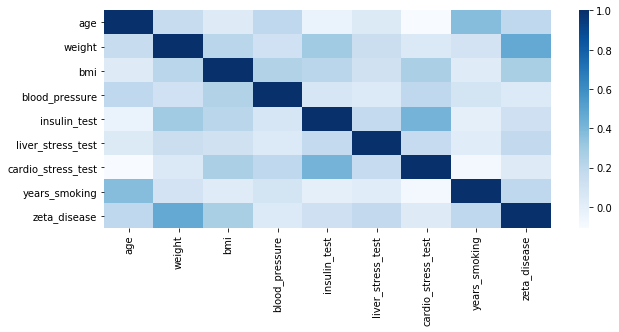

In [12]:
plt.figure(figsize=(10,4))
sns.heatmap(corr, cmap='Blues')

## Read the Test data

In [13]:
df_test = pd.read_csv(r'2021-01-21_zeta-disease_prediction-data_dsi-take-home-challenge.csv')
df_test.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,24,151,39.5,69,72,1.3968,56,4,NaN
1,27,179,35.5,89,156,1.6608,43,6,NaN
2,34,147,26.9,76,74,1.6958,53,2,NaN
3,35,206,32.4,73,127,1.4608,61,6,NaN
4,60,193,29.8,62,192,1.7798,65,9,NaN


In [14]:
df_test.shape

(20, 9)

In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 20 non-null     int64  
 1   weight              20 non-null     int64  
 2   bmi                 20 non-null     float64
 3   blood_pressure      20 non-null     int64  
 4   insulin_test        20 non-null     int64  
 5   liver_stress_test   20 non-null     float64
 6   cardio_stress_test  20 non-null     int64  
 7   years_smoking       20 non-null     int64  
 8   zeta_disease        0 non-null      float64
dtypes: float64(3), int64(6)
memory usage: 1.5 KB


In [16]:
x_testdata = df_test[['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test', 'liver_stress_test', 'cardio_stress_test', 'years_smoking']]

# Using Logistic Regression

## Build a Logistic Regression Model

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
x = df_train[['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test', 'liver_stress_test', 'cardio_stress_test', 'years_smoking']]
y = df_train['zeta_disease']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=27)
logistic_regression= LogisticRegression(max_iter=10000)
logistic_regression.fit(x_train,y_train)
y_pred=logistic_regression.predict(x_test)

In [19]:
# compute the confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,115,9
1,36,40


In [20]:
# calculate the accuracy
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.775


### The accuracy with the Logistic regression is around 77.5%

###  Now, we train with the entire model

In [21]:
x = df_train[['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test', 'liver_stress_test', 'cardio_stress_test', 'years_smoking']]
y = df_train['zeta_disease']
logistic_regression= LogisticRegression(max_iter=10000)
logistic_regression.fit(x,y);

### Let us do the prediction using test data

In [22]:
y_pred=logistic_regression.predict(x_testdata)
y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

### Appending the predicted values to  '_zeta-disease_prediction-data_' dataset

In [23]:
df_predicted = x_testdata
df_predicted['Predicted'] = y_pred
df_predicted

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,Predicted
0,24,151,39.5,69,72,1.3968,56,4,0
1,27,179,35.5,89,156,1.6608,43,6,1
2,34,147,26.9,76,74,1.6958,53,2,0
3,35,206,32.4,73,127,1.4608,61,6,1
4,60,193,29.8,62,192,1.7798,65,9,1
5,45,120,36.5,108,50,1.2978,54,12,0
6,20,139,38.2,61,77,1.5818,68,3,0
7,23,137,31.2,70,73,1.4168,59,7,0
8,36,195,30.5,59,141,1.4498,59,6,1
9,19,193,25.8,84,66,1.7938,50,3,1


# Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfClassifier=RandomForestClassifier(random_state = 27)
rfClassifier.fit(x_train,y_train)
y_pred=rfClassifier.predict(x_test)

In [25]:
# compute the confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,110,14
1,32,44


In [26]:
# calculate the accuracy
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.77


### The accuracy with the Logistic regression is around 77%

###  Now we will train with the entire model

In [27]:
x = df_train[['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test', 'liver_stress_test', 'cardio_stress_test', 'years_smoking']]
y = df_train['zeta_disease']
rfClassifier = RandomForestClassifier(random_state = 27)
rfClassifier.fit(x,y);

### Let us do the prediction using test data

In [28]:
x_testdata = df_test[['age', 'weight', 'bmi', 'blood_pressure', 'insulin_test', 'liver_stress_test', 'cardio_stress_test', 'years_smoking']]
y_pred=rfClassifier.predict(x_testdata)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

### Appending the predicted values to  '_zeta-disease_prediction-data_' dataset

In [29]:
df_predicted = x_testdata
df_predicted['Predicted'] = y_pred
df_predicted

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,Predicted
0,24,151,39.5,69,72,1.3968,56,4,0
1,27,179,35.5,89,156,1.6608,43,6,1
2,34,147,26.9,76,74,1.6958,53,2,0
3,35,206,32.4,73,127,1.4608,61,6,1
4,60,193,29.8,62,192,1.7798,65,9,0
5,45,120,36.5,108,50,1.2978,54,12,1
6,20,139,38.2,61,77,1.5818,68,3,0
7,23,137,31.2,70,73,1.4168,59,7,0
8,36,195,30.5,59,141,1.4498,59,6,1
9,19,193,25.8,84,66,1.7938,50,3,0


# Classification accuracy with Logistic regression and Random Forest classifier is around 77%